# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [7]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

file_path = '/Users/baejuyeon/Downloads/weather_classification_data.csv'
weather_data = pd.read_csv(file_path)

print(weather_data)

       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km) 

In [10]:
# 계절별 데이터 개수 세기
season_counts = weather_data['Season'].value_counts()
print(season_counts)

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


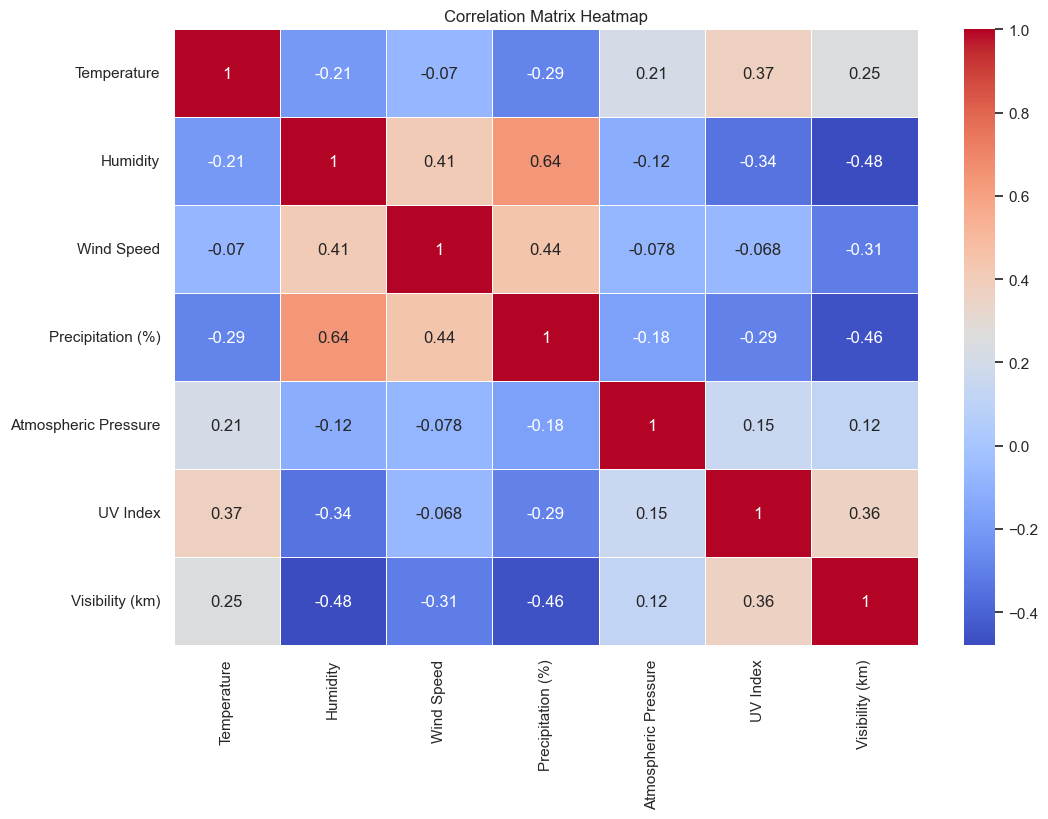

In [30]:
# 수치형 열만 선택
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                   'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
numeric_data = weather_data[numeric_columns]

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


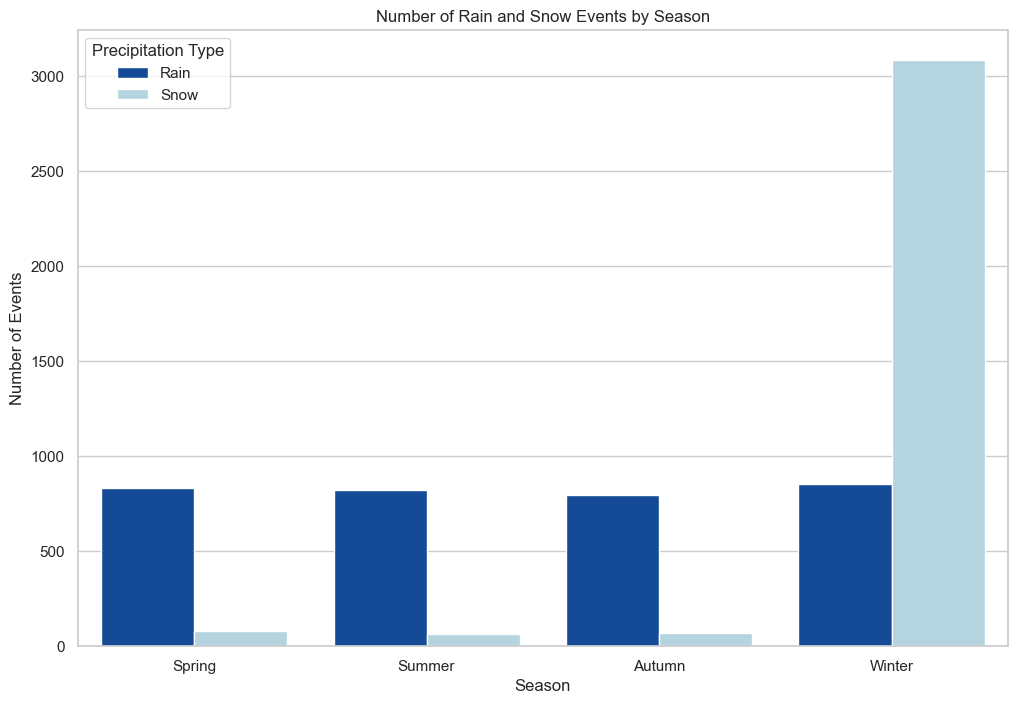

In [40]:
#막대 그래프

# 사용자 정의 색상 팔레트 설정
custom_palette = {
    'Rain': '#0047AB',  # 코발트 블루
    'Snow': '#ADD8E6'   # 라이트 블루 (아이스 블루)
}

# 강수 유형을 비 또는 눈으로 분류하는 조건 추가
weather_data['Precipitation Type'] = weather_data['Weather Type'].apply(lambda x: 'Rain' if 'Rain' in x else ('Snow' if 'Snow' in x else 'None'))

# 계절별 비와 눈 이벤트의 횟수 계산
precipitation_counts = weather_data[weather_data['Precipitation Type'] != 'None'].groupby(['Season', 'Precipitation Type']).size().reset_index(name='Count')

# 계절 순서를 봄, 여름, 가을, 겨울로 설정
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 그림(figure) 생성
plt.figure(figsize=(12, 8))

# 그래프 그리기: 계절별 비와 눈 이벤트의 횟수
sns.barplot(x='Season', y='Count', hue='Precipitation Type', data=precipitation_counts, palette=custom_palette, order=season_order)
plt.title('Number of Rain and Snow Events by Season')
plt.xlabel('Season')
plt.ylabel('Number of Events')
plt.legend(title='Precipitation Type')

# 그래프 보여주기
plt.show()


/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11203/4278072506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cloud Cover', y='Precipitation (%)', data=cloud_cover_avg_precipitation, palette='Blues_d')


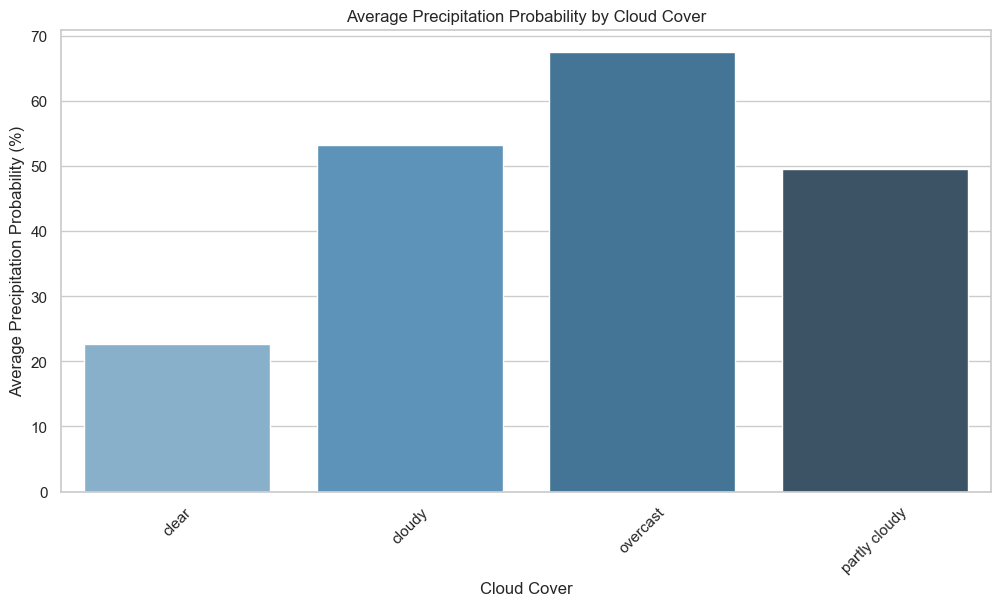

In [39]:
# 구름 덮개 상태별 평균 강수확률 계산
cloud_cover_avg_precipitation = weather_data.groupby('Cloud Cover')['Precipitation (%)'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Cloud Cover', y='Precipitation (%)', data=cloud_cover_avg_precipitation, palette='Blues_d')
plt.title('Average Precipitation Probability by Cloud Cover')
plt.xlabel('Cloud Cover')
plt.ylabel('Average Precipitation Probability (%)')
plt.xticks(rotation=45)
plt.show()

/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11203/2973966674.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_uv_index = weather_data.groupby('Temperature Bin')['UV Index'].mean().reset_index()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarn

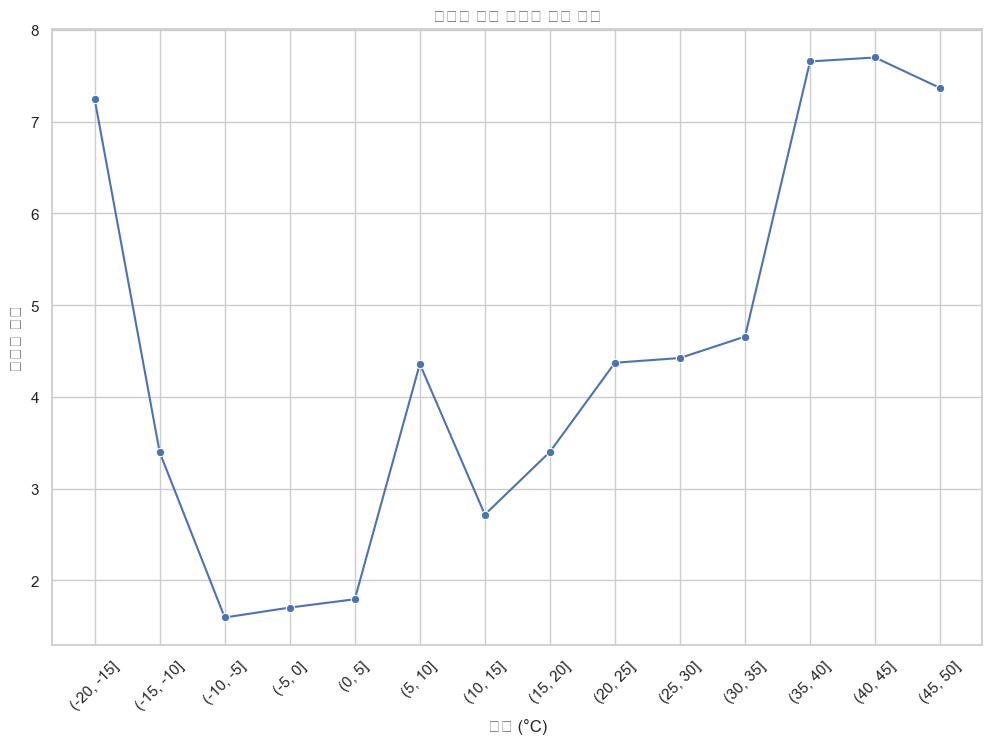

In [23]:
# 선 그래프 

# 온도를 -20도부터 50도까지 5도 단위로 범주화
bins = np.arange(-20, 55, 5)
weather_data['Temperature Bin'] = pd.cut(weather_data['Temperature'], bins=bins)

# 각 온도 범주별 평균 자외선 지수 계산
temperature_uv_index = weather_data.groupby('Temperature Bin')['UV Index'].mean().reset_index()

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 그림(figure) 생성
plt.figure(figsize=(12, 8))

# 그래프 그리기: 온도에 따른 자외선 지수 변화
sns.lineplot(x=temperature_uv_index['Temperature Bin'].astype(str), y=temperature_uv_index['UV Index'], marker='o')
plt.title('온도에 따른 자외선 지수 변화')
plt.xlabel('온도 (°C)')
plt.ylabel('자외선 지수')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()


In [22]:
# 온도와 자외선 지수의 상관관계 계산
correlation = weather_data[['Temperature', 'UV Index']].corr()

# 상관관계 출력
print("온도와 자외선 지수의 상관관계:")
print(correlation)

온도와 자외선 지수의 상관관계:
             Temperature  UV Index
Temperature     1.000000  0.374773
UV Index        0.374773  1.000000


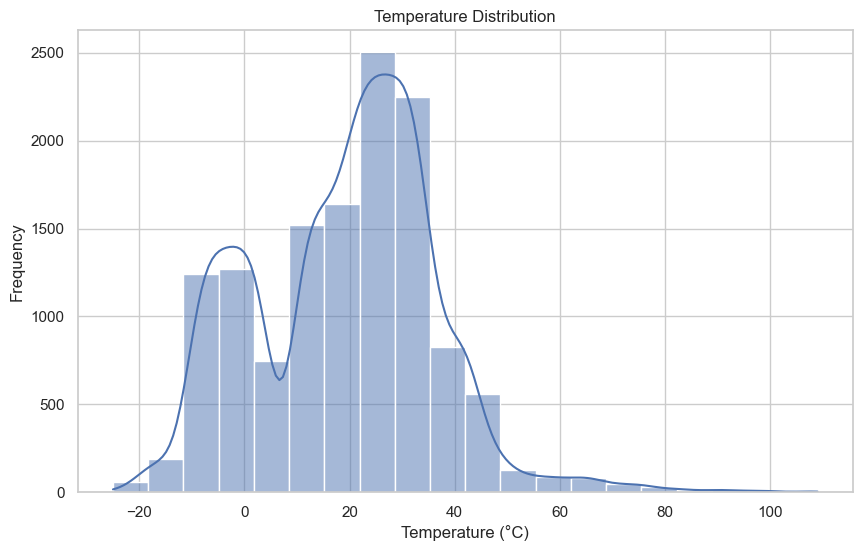

In [24]:
# 3. 히스토그램

# 그림(figure) 생성
plt.figure(figsize=(10, 6))

# 히스토그램 그리기: 온도 분포
sns.histplot(weather_data['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()


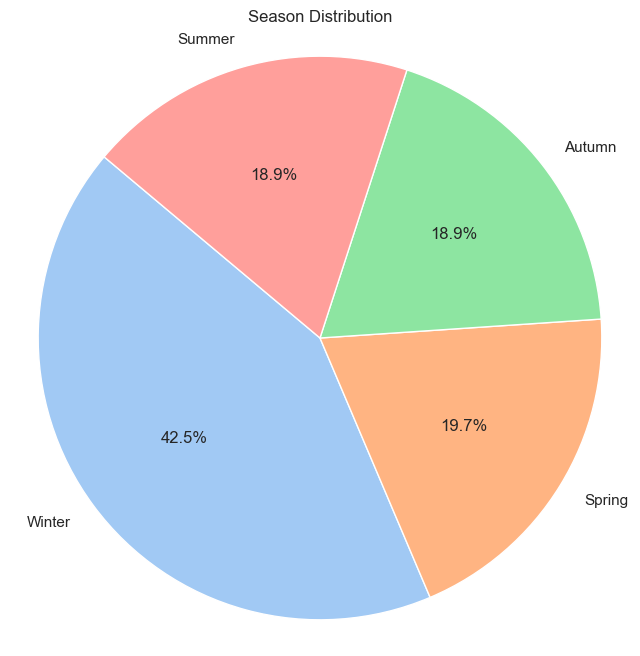

In [26]:
# 4. 파이차트

# 계절별 데이터 개수 계산
season_counts = weather_data['Season'].value_counts()

# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Season Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 그래프 보여주기
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/

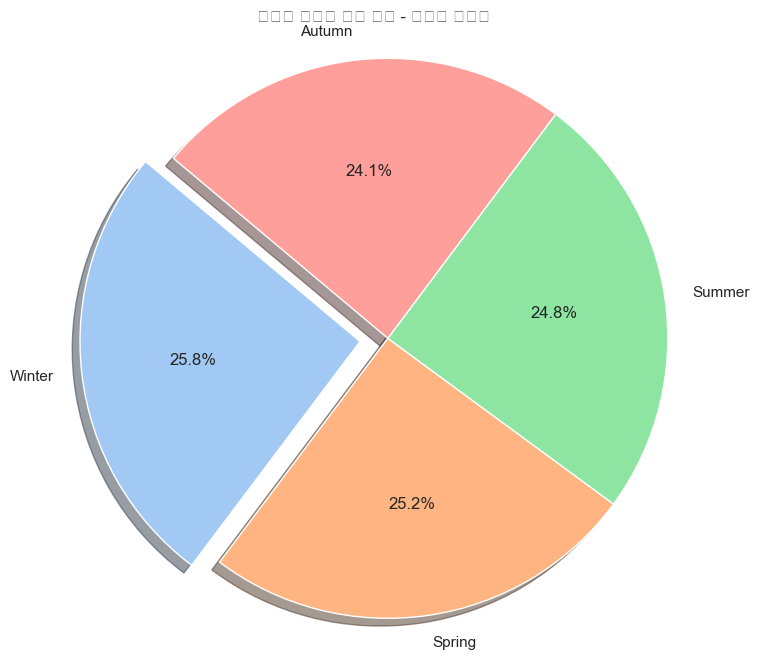

In [47]:
# 비오는 날의 데이터를 필터링
rainy_days = weather_data[weather_data['Weather Type'].str.contains('Rain')]

# 계절별 비오는 날의 개수를 계산
rainy_season_counts = rainy_days['Season'].value_counts()

# 복잡한 파이차트를 위한 데이터 설정
sizes = rainy_season_counts
labels = rainy_season_counts.index
colors = sns.color_palette("pastel")
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # 가장 큰 섹터를 강조하기 위해 떨어뜨림

# 복잡한 디자인의 파이차트 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('계절별 비오는 날의 분포 - 복잡한 디자인')
plt.axis('equal')  # 파이차트를 원형으로 유지

# 그래프 보여주기
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-p

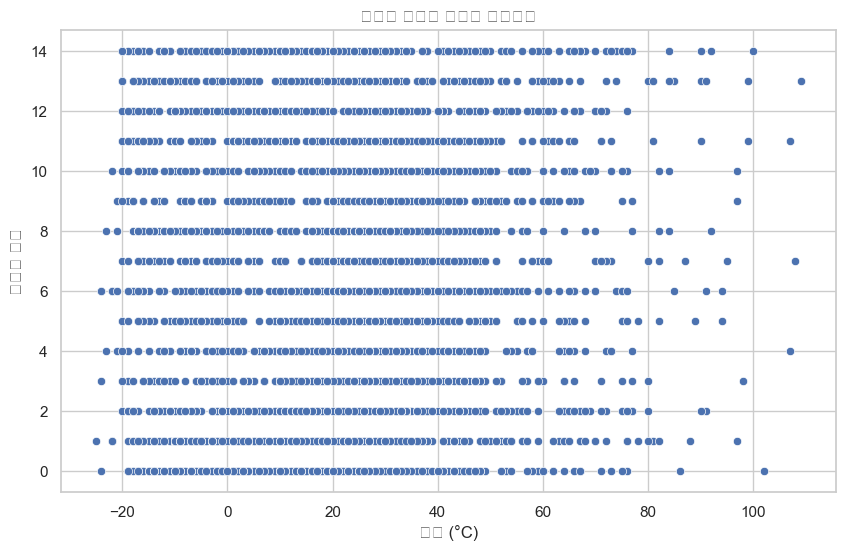

In [32]:
# 5. 산점도
# 그림(figure) 생성
plt.figure(figsize=(10, 6))

# 산점도 그리기: 온도와 자외선 지수
sns.scatterplot(x='Temperature', y='UV Index', data=weather_data)
plt.title('온도와 자외선 지수의 상관관계')
plt.xlabel('온도 (°C)')
plt.ylabel('자외선 지수')

# 그래프 보여주기
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site

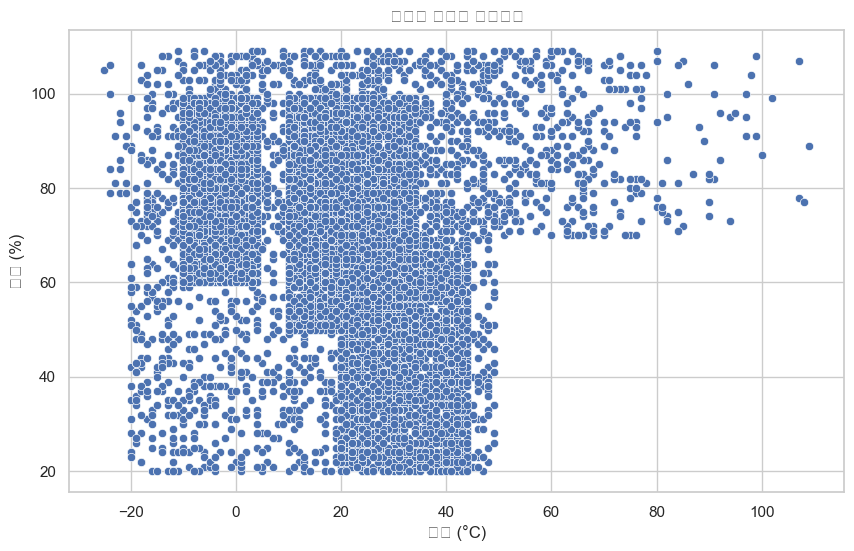

In [33]:
# 그림(figure) 생성
plt.figure(figsize=(10, 6))

# 산점도 그리기: 온도와 습도
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data)
plt.title('온도와 습도의 상관관계')
plt.xlabel('온도 (°C)')
plt.ylabel('습도 (%)')

# 그래프 보여주기
plt.show()

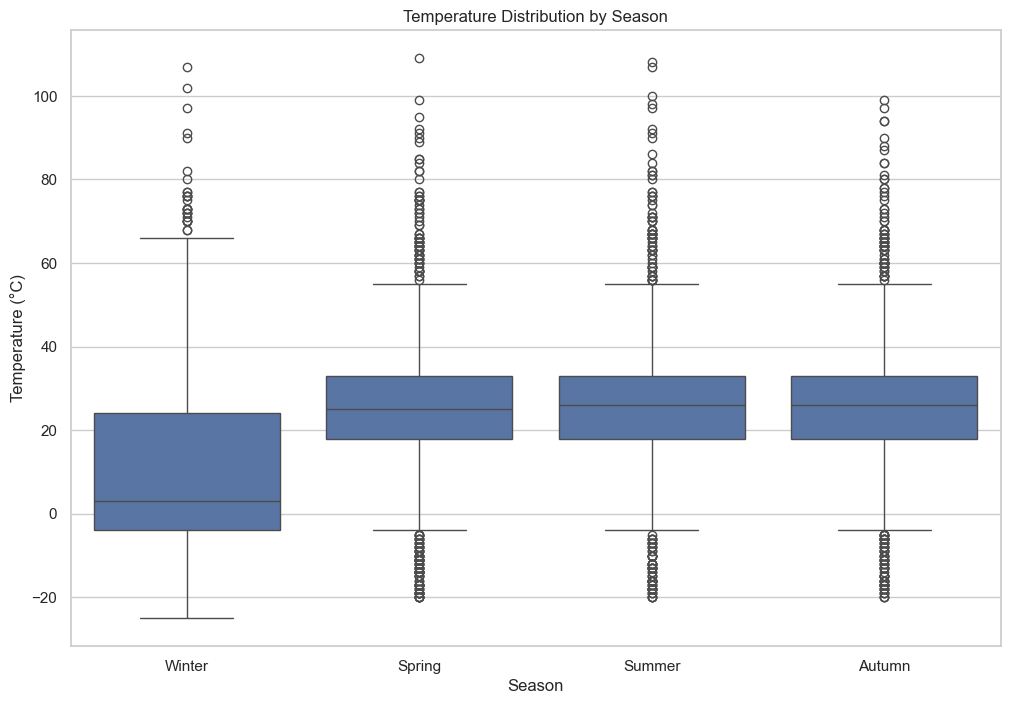

In [35]:
# 6. 박스플롯

# 그림(figure) 생성
plt.figure(figsize=(12, 8))

# 박스플롯 그리기: 계절별 온도 분포
sns.boxplot(x='Season', y='Temperature', data=weather_data)
plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')

# 그래프 보여주기
plt.show()

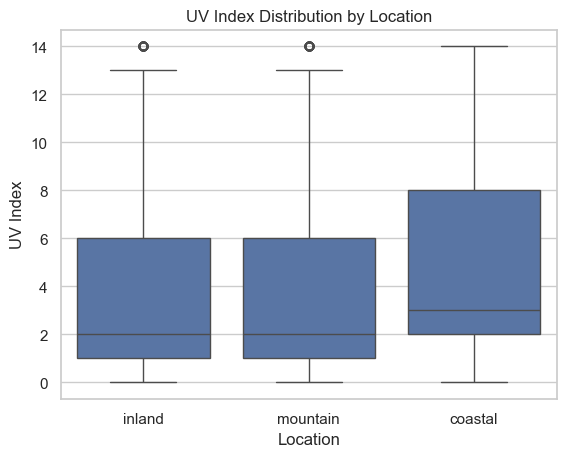

In [36]:
# 박스플롯 그리기: 위치별 자외선 지수 분포
sns.boxplot(x='Location', y='UV Index', data=weather_data)
plt.title('UV Index Distribution by Location')
plt.xlabel('Location')
plt.ylabel('UV Index')

# 그래프 보여주기
plt.show()

In [50]:
# 이상치를 제거하는 함수 정의
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# 이상치를 제거할 열 목록
columns_to_check = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure']

# 원본 데이터 개수
original_count = data.shape[0]

# 이상치 제거
cleaned_data = remove_outliers(weather_data, columns_to_check)

# 이상치 제거 후 데이터 개수
cleaned_count = cleaned_data.shape[0]

# 제거된 이상치 개수
removed_outliers_count = original_count - cleaned_count

print("원본 데이터 개수:", original_count)
print("이상치를 제거한 후 데이터 개수:", cleaned_count)
print("제거된 이상치 개수:", removed_outliers_count)



원본 데이터 개수: 13200
이상치를 제거한 후 데이터 개수: 11785
제거된 이상치 개수: 1415


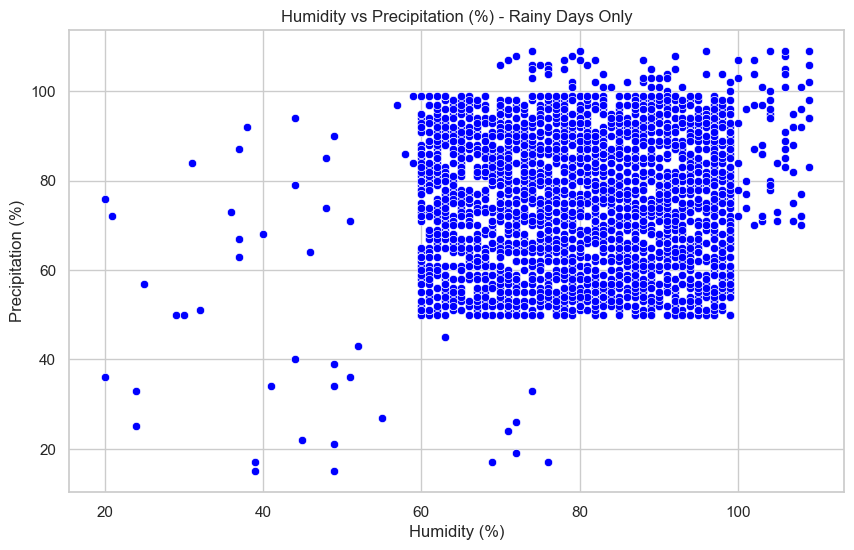

In [52]:
# 비오는 날을 카테고리화하는 새로운 열 추가
cleaned_data['Rainy'] = cleaned_data['Weather Type'].str.contains('Rain')

# 비가 오지 않는 날 제외
rainy_days_only = cleaned_data[cleaned_data['Rainy']]

# 습도와 강수 확률에 따른 산점도 그래프 생성 (비오는 날만 파랑색으로 표시)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rainy_days_only['Humidity'], y=rainy_days_only['Precipitation (%)'], color='blue')
plt.title('Humidity vs Precipitation (%) - Rainy Days Only')
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (%)')
plt.show()

/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11203/486286210.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data_sampled['Wind Speed MA'] = season_data_sampled['Wind Speed'].rolling(window=7).mean()
/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11203/486286210.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data_sampled['Wind Speed MA'] = season_data_sampled['Wind Speed'].rolling(window=7).mean()
/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_1

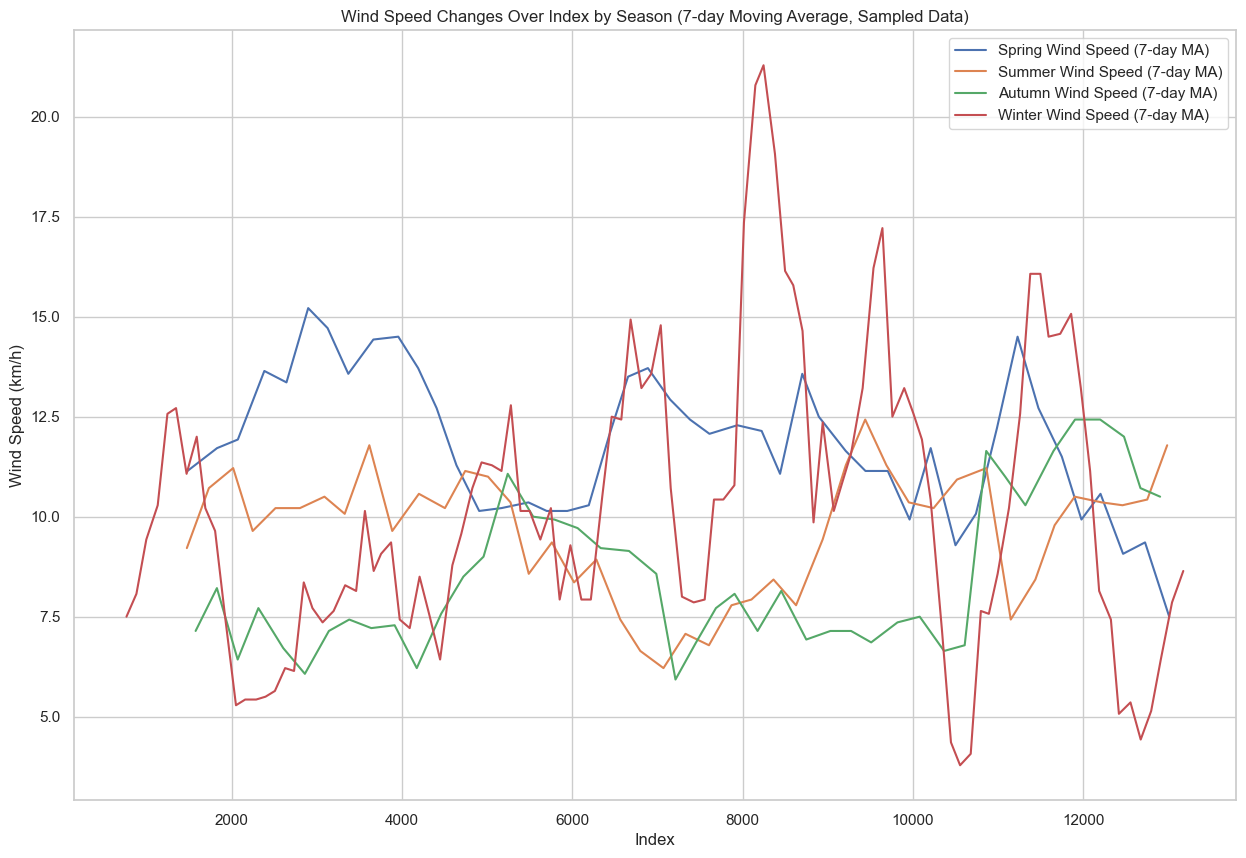

In [58]:
# 계절 목록
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# 샘플링 간격 설정
sampling_interval = 50

# 그래프 생성
plt.figure(figsize=(15, 10))

for season in seasons:
    # 특정 계절 데이터 필터링
    season_data = weather_data[weather_data['Season'] == season]
    
    # 샘플링
    season_data_sampled = season_data[::sampling_interval]
    
    # 이동 평균 계산 (예: 7일 이동 평균)
    season_data_sampled['Wind Speed MA'] = season_data_sampled['Wind Speed'].rolling(window=7).mean()
    
    # 이동 평균 그래프 
    plt.plot(season_data_sampled.index, season_data_sampled['Wind Speed MA'], label=f'{season} Wind Speed (7-day MA)')

plt.title('Wind Speed Changes Over Index by Season (7-day Moving Average, Sampled Data)')
plt.xlabel('Index')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()